## noise SignGen เพิ่มขีดเเบบสุ่ม ##

In [3]:
from PIL import Image, ImageDraw, ImageFont
import random
def signGen(list_position, message, font_name, size): #list:list_position, message:str, font_name:str, size:int
    # init image size
    W = list_position[1] - list_position[0]
    H = list_position[3] - list_position[2]
    image_size = (W, H)
    # load font
    font = ImageFont.truetype(font_name, size)
    if font.getsize(message)[0] < W: # Normal Case
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        for _ in range(10):
            x1 = random.randint(0, image.size[0])
            y1 = random.randint(0, image.size[1])
            x2 = random.randint(0, image.size[0])
            y2 = random.randint(0, image.size[1])
            draw.line([(x1, y1), (x2, y2)], fill=(0, 0, 0), width=2)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        #write text
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black')
    else: # Case Text too long
        start_size = 1
        # create blank image
        image = Image.new('RGB', image_size, 'white')
        draw = ImageDraw.Draw(image)
        font = ImageFont.truetype(font_name, start_size)
        while font.getsize(message)[0] < W:
        # iterate until the text size is just larger than the criteria
            start_size += 1
            font = ImageFont.truetype(font_name, start_size)
        start_size -= 1
        font = ImageFont.truetype(font_name, start_size)
        _, _, w, h = draw.textbbox((0, 0), message, font=font)
        draw.text(((image_size[0]-w)/2, (image_size[1]-h)/2), message, font=font, fill='black') 
        for _ in range(5):
            x1 = random.randint(0, image.size[0])
            y1 = random.randint(0, image.size[1])
            x2 = random.randint(0, image.size[0])
            y2 = random.randint(0, image.size[1])
            draw.line([(x1, y1), (x2, y2)], fill=(0, 0, 0), width=2)
    
    image2 = image.convert('RGBA')
    # rotated image
    rot = image2.rotate(random.choice(range(-8,8)), expand=1)
    # a white image same size as rotated image
    fff = Image.new('RGBA', rot.size, (255,)*4)
    # create a composite image using the alpha layer of rot as a mask
    out = Image.composite(rot, fff, rot)
    
    left = (out.size[0] - font.getsize(message)[0])/2
    top = (out.size[1] - font.getsize(message)[1])/2
    right = (out.size[0] + font.getsize(message)[0])/2
    bottom = (out.size[1] + font.getsize(message)[1])/2
    
    out = out.crop((left, top-15, right, bottom+15))
    return {'image_obj':out,'bb':list_position,'text':message,}

C:\Users\alizw\AppData\Local\Temp\ipykernel_3896\1805197276.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(message)[0] < W: # Normal Case
C:\Users\alizw\AppData\Local\Temp\ipykernel_3896\1805197276.py:52: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  left = (out.size[0] - font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_3896\1805197276.py:53: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  top = (out.size[1] - font.getsize(message)[1])/2
C:\Users\alizw\AppData\Local\Temp\ipykernel_3896\1805197276.py:54: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  right = (out.size[0] + font.getsize(message)[0])/2
C:\Users\alizw\AppData\Local\Temp\i

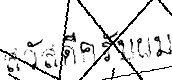

In [4]:
out= signGen([0,200,0,200], 'สวัสดีครับผม','./handwriting/th/SOV_MuekMod.ttf', 50)
out['image_obj']